In [1]:
# Importing neccessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam

Using TensorFlow backend.
/home/ujjwal/anaconda3/envs/kaggle/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# reading excel file containing training dataset
xls = pd.ExcelFile('CryptoGrams.xlsx')
xls.sheet_names

['Vigenere', 'SS']

In [3]:
# extracting simple substitution and vignere substitution encyption training data in different dataframes
ss = pd.read_excel(xls, "SS", header=None, names=["cipher"])                    # simple substitution
vig = pd.read_excel(xls, "Vigenere", header=None, names=["cipher"])             # vignere substituion

# Data Preprocessing

In this classification task, a cipher is considered as a bag of words (letters to be exact) and it is represented by a vector whose elements correspond to the frequency of occurrence of different characters in the cipher. The dimension of the vector is the same as the size of the dictionary built by including all the distinct words that occur in a corpus of ciphers. Let N be the size of the dictionary. Let ti be the ith word or term in the dictionary, and tf(ti,d) be the frequency of occurrence of ti in a given cipher d.

A dictionary is constructed using a number of cipher texts in a corpus. We consider two methods for constructing the dictionary. In the first method, cipher texts generated using different encryption methods are included in a single corpus. This method is called the common dictionary method.

In [4]:
# concatinating the 2 dataframes to create a one large training set
# This is created so that we can use common "dictionary scheme" 
df = pd.concat([ss, vig])

In [5]:
# Creating training labels
# 0 -> simple substitution
# 1-> vignere substitution
y =  [0]*50 + [1]*50

In [6]:
# Now we find tfidf for every character in a cipher
v = TfidfVectorizer(analyzer='char')      # Here we create a tfidf object to find the tfidf of a cipher with focus on every character rather than every word
x = v.fit_transform(df['cipher'])         # we convert out text data into numbers that represent their tfidf representation
len(v.get_feature_names())                # it gives us number of charcters in our dictionary

27

In [7]:
# processing train data to feed into neural network
import numpy as np
x = x.todense()
x = np.array(x)
y = np.array(y)
y = y.reshape((100,1))
print("x shape : ", x.shape)
print("y shape : ", y.shape)

x shape :  (100, 27)
y shape :  (100, 1)


In [8]:
# following code converts the test dataset into a test.csv file for further predicting tasks.
import docx
doc = docx.Document("dataset_cryptosystem.docx")

text = []
for p in doc.paragraphs:
    text.append(p.text)
    
len(text)

d = [0,1,2,3,4,5,6,7,8,9,10,11, 12, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 34, 35, 36, 38]
d = sorted(d, reverse=True)
for i in d:
    del text[i]
test = pd.DataFrame(text, columns=["cipher"])
# test.to_csv("test.csv", index_label=False, header=False)

In [9]:
# preprocessing test data
#test = pd.read_csv("test.csv", header=None, names=["cipher"])

x_test = v.fit_transform(test['cipher'])

x_test = x_test.todense()
x_test = np.array(x_test)

# Model

In [22]:
# Neural Network
model = Sequential()                                          # sequential network
model.add(Dense(64, input_dim=27, activation='relu'))         # adding 5 dense layer having 64 hidden units
model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.3))                                        # dropout
model.add(Dense(1, activation='sigmoid'))                      # output layer

model.compile(loss='binary_crossentropy',                      # compiling the model with objective function-binary crossentropy, and optimizer-SGD
              optimizer='Adam',
              metrics=['accuracy'])

model.fit(x, y,                                                # fitting the model
          epochs=20,
          batch_size=128)

Epoch 1/20
100/100 [==============================] - 0s - loss: 0.6970 - acc: 0.4200
Epoch 2/20
100/100 [==============================] - 0s - loss: 0.6970 - acc: 0.4700
Epoch 3/20
100/100 [==============================] - 0s - loss: 0.6939 - acc: 0.5200
Epoch 4/20
100/100 [==============================] - 0s - loss: 0.6903 - acc: 0.5200
Epoch 5/20
100/100 [==============================] - 0s - loss: 0.6953 - acc: 0.5200
Epoch 6/20
100/100 [==============================] - 0s - loss: 0.6951 - acc: 0.5400
Epoch 7/20
100/100 [==============================] - 0s - loss: 0.6906 - acc: 0.5500
Epoch 8/20
100/100 [==============================] - 0s - loss: 0.6897 - acc: 0.5600
Epoch 9/20
100/100 [==============================] - 0s - loss: 0.6925 - acc: 0.5100
Epoch 10/20
100/100 [==============================] - 0s - loss: 0.6906 - acc: 0.5000
Epoch 11/20
100/100 [==============================] - 0s - loss: 0.6848 - acc: 0.6100
Epoch 12/20
100/100 [==============================]

In [24]:
# Predictions
y_test = model.predict(x_test)
pred = []
for i in range(len(y_test)):
    if y_test[i]>=0.5:
        y_test[i]=1
        pred.append("vignere")
    else:
        y_test[i]=0
        pred.append("simple substitution")
pred

['vignere',
 'vignere',
 'simple substitution',
 'vignere',
 'simple substitution',
 'vignere',
 'vignere',
 'vignere',
 'simple substitution',
 'simple substitution',
 'simple substitution',
 'simple substitution',
 'simple substitution',
 'simple substitution',
 'simple substitution',
 'simple substitution',
 'simple substitution',
 'simple substitution',
 'simple substitution',
 'simple substitution']

In [25]:
test_pred = [1]*10 + [0]*10

## Plotting accuracy for variable parameters

In [27]:
def Model(learning_rate=0.001, epoch=20, batch_size=128, dropout_probab=0.3, hidden_units=40):
    model = Sequential()                                          # sequential network
    model.add(Dense(64, input_dim=27, activation='relu'))         # adding 5 dense layer having 64 hidden units
    model.add(Dense(hidden_units, activation='relu'))
    model.add(Dense(hidden_units, activation='relu'))
    model.add(Dense(hidden_units, activation='relu'))
    model.add(Dropout(dropout_probab))                             # dropout
    model.add(Dense(1, activation='sigmoid'))                      # output layer

    model.compile(loss='binary_crossentropy',                      # compiling the model with objective function-binary crossentropy, and optimizer-SGD
                  optimizer=Adam(lr=learning_rate),
                  metrics=['accuracy'])

    model.fit(x, y,                                                # fitting the model
              epochs=epoch,
              batch_size=batch_size, verbose=0)
    return model

In [29]:
lr = [0.1,0.001,0.0001]
accuracy = []
for i in lr:
    model = Model(learning_rate=i)
    y_pred = model.predict(x_test)        # making prediction on test data
    count = 0
    for j in range(len(test_pred)):
        if y_pred[j]>=0.5:
            y_pred[j]=1
        else:
            y_pred[j]=0
        if y_pred[j] == test_pred[j]:
            count += 1
    acc = count/20
    accuracy.append(acc)
import matplotlib.pyplot as plt

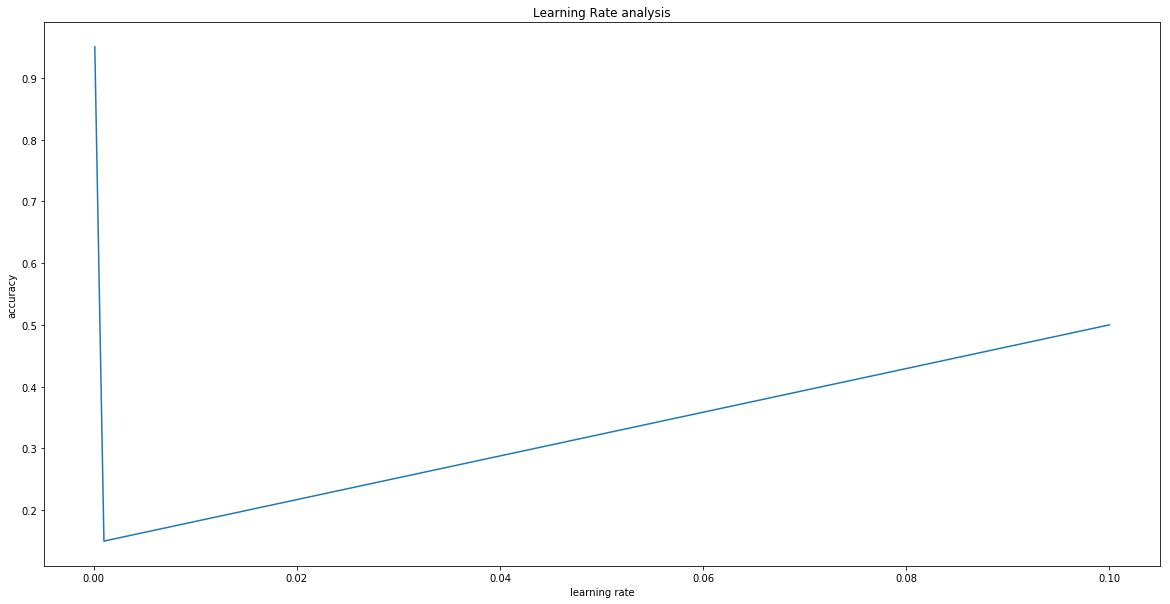

In [31]:
plt.figure(figsize=(20,10))
plt.plot(lr, accuracy)
plt.xlabel("learning rate")
plt.ylabel("accuracy")
plt.title("Learning Rate analysis")
plt.show()

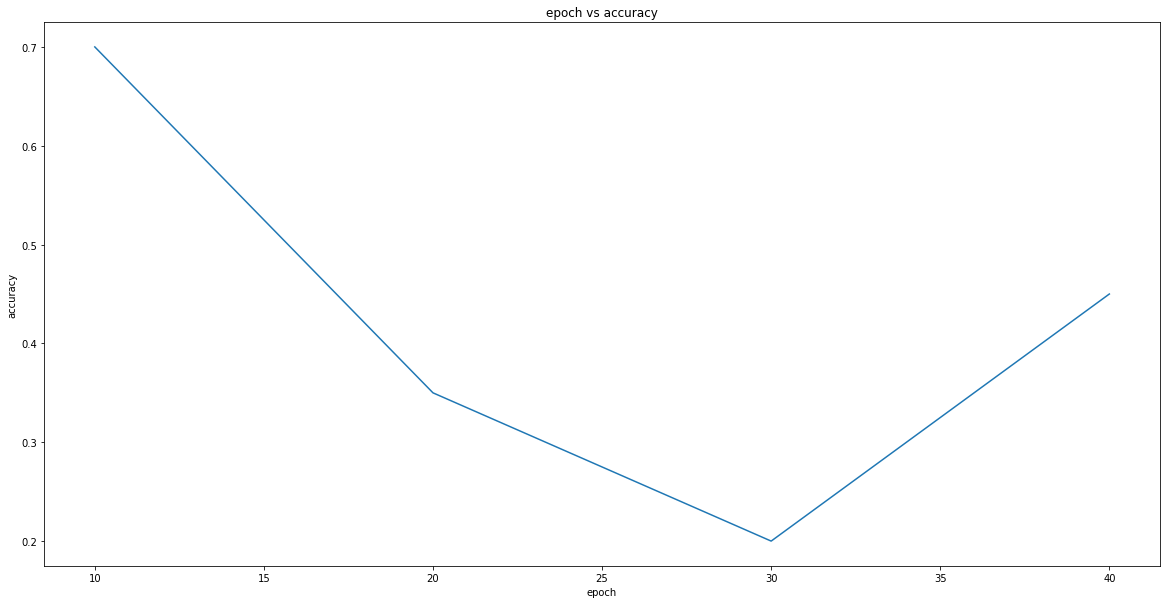

In [34]:
epochs = range(10,50,10)
accuracy = []
for i in epochs:
    model = Model(epoch=i)
    y_pred = model.predict(x_test)        # making prediction on test data
    count = 0
    for j in range(len(test_pred)):
        if y_pred[j]>=0.5:
            y_pred[j]=1
        else:
            y_pred[j]=0
        if y_pred[j] == test_pred[j]:
            count += 1
    acc = count/20
    accuracy.append(acc)
plt.figure(figsize=(20,10))
plt.plot(epochs, accuracy)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("epoch vs accuracy")
plt.show()

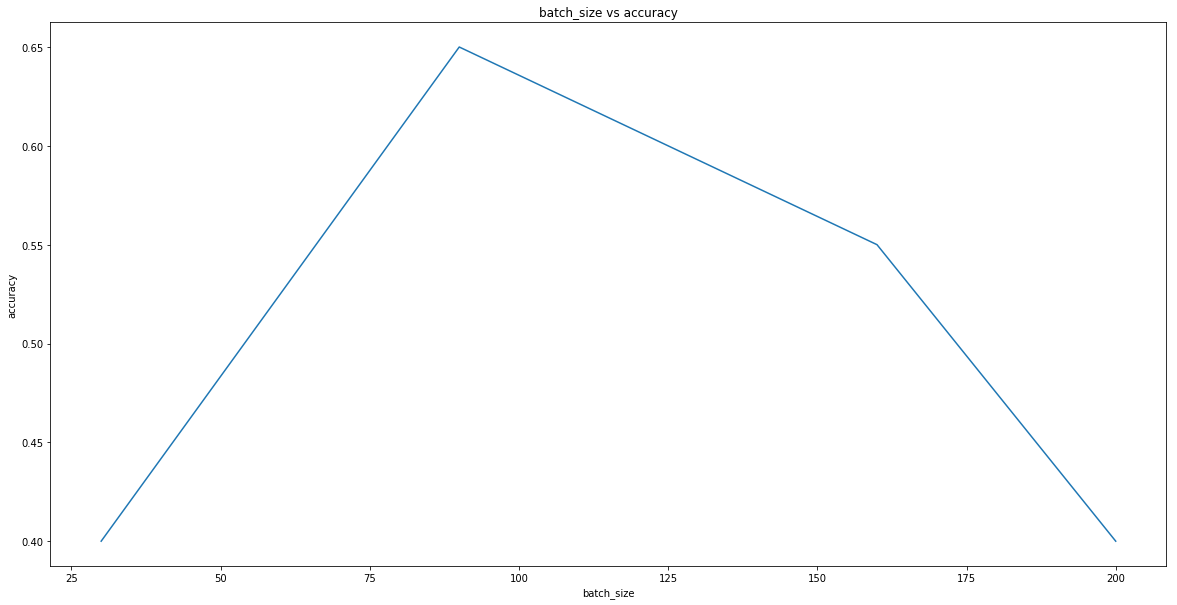

In [35]:
batch = [30, 90, 160, 200]
accuracy = []
for i in batch:
    model = Model(batch_size=i)
    y_pred = model.predict(x_test)        # making prediction on test data
    count = 0
    for j in range(len(test_pred)):
        if y_pred[j]>=0.5:
            y_pred[j]=1
        else:
            y_pred[j]=0
        if y_pred[j] == test_pred[j]:
            count += 1
    acc = count/20
    accuracy.append(acc)
plt.figure(figsize=(20,10))
plt.plot(batch, accuracy)
plt.xlabel("batch_size")
plt.ylabel("accuracy")
plt.title("batch_size vs accuracy")
plt.show()